<a id='head'></a>

# Выявление закономерностей успешности игр

## Оглавление
 
- [**Введение**](#intro)
    - [Входные данные](#input_data)
    - [Цели исследования](#purpose)
    - [Ход исследования](#progress)
    
- [**1. Обзор данных**](#review)
    - [1.1 Импорт библиотек и таблиц](#review_01)
    - [1.2 Предварительное знакомство с данными](#review_02)
    - [Выводы](#review_conclusions)

- [**2. Предобработка данных**](#preprocessing)
    - [2.1 Пропущенные значения](#preprocessing_01)
    - [2.2 Типы данных](#preprocessing_02)
    - [2.3 Дубликаты](#preprocessing_03)
    - [Выводы](#preprocessing_conclusions)

- [**3. Расчёты и дообогащение таблицы данными**](#data_enrichment)
    - [3.1 Возрастной рейтинг](#data_enrichment_01)
    - [3.2 Общие продажи](#data_enrichment_02)
    - [3.3 Корректировка оценок](#data_enrichment_03)
    - [Выводы](#data_enrichment_conclusions)
    
- [**4. Исследовательский анализ данных**](#research)
    - [4.1 Количество выпущенных игр за определенный год](#research_01)
    - [4.2 Анализ продаж по платформам за все время](#research_02)
    - [4.3 Актуализация выборки для решения текущей задачи](#research_03)
    - [4.4 Определение актуальных лидирующих платформ](#research_04)
    - [4.5 Диаграммы размаха](#research_05)
    - [4.6 Влияние отзывов на продажи](#research_06)
    - [4.7 Распределение игр по жанрам](#research_07)
    - [4.8 Портрет пользователя каждого региона](#research_08)
    - [Выводы](#research_conclusions)

- [**5. Проверка гипотез**](#hypotheses)
    - [5.1 Пользовательские рейтинги платформ Xbox One и PC](#hypotheses_01)
    - [5.2 Пользовательские рейтинги жанров Action и Sports](#hypotheses_02)
    - [Выводы](#hypotheses_conclusions)

- [**6. Общий вывод**](#final_conclusion)
    - [6.1 Общая информация](#final_conclusion_01)
    - [6.2 Предобработка данных](#final_conclusion_02)
    - [6.3 Расчеты и дообогщение таблицы](#final_conclusion_03)
    - [6.4 Исследовательский анализ данных](#final_conclusion_04)
    - [6.5 Проверка гипотез](#final_conclusion_05)
    - [Итоги](#final)


<a id='intro'></a>
## Введение

Мы работаем в интернет-магазине **«Стримчик»**, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, `Xbox` или `PlayStation`). Нам нужно **выявить определяющие успешность игры закономерности**. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

У нас есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, **`Для взрослых`**, **`Для детей младшего возраста`** или **`Для подростков`**.

<a id='input_data'></a>
### Входные данные [▴](#head)

**У нас есть следующая таблица:**

- `/datasets/games.csv`

**Описание данных**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 

**Примечание:** Данные за 2016 год могут быть неполными.


<a id='purpose'></a>
### Цели исследования [▴](#head)

**Провести исследовательский анализ данных:**
- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий **актуальный период**. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за **предыдущие годы**.
- Определить какие платформы лидируют по продажам, растут или падают? Выберать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


**Составить портрет пользователя каждого региона.**

Определить для пользователя каждого региона (`NA`, `EU`, `JP`):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


**Проверить гипотезы**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

**Дополнительно пояснить:**
- Как вы сформулировалась нулевая и альтернативная гипотезы;
- Какой критерий применялся для проверки гипотез и почему.

<a id='progress'></a>
### Ход исследования [▴](#head)

Исследование пройдет в несколько этапов:

[**Обзор данных**](#review)

[**Предобработка данных**](#preprocessing)
- Заменить названия столбцов (привести к хорошему стилю);
- Преобразовать данные в нужные типы. Описать, в каких столбцах изменялся тип данных и почему;
- Обработать пропуски при необходимости:
    - Объяснить, почему пропуски заполнялись определённым образом или почему не заполнялись;
    - Описать причины, которые могли привести к пропускам;
    - Обратить внимание на аббревиатуру `tbd` в столбце с оценкой пользователей. Отдельно разберать это значение и описать, как его обработать;


[**Расчёты и дообогащение таблицы данными**](#data_enrichment)

- Требуется посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

[**Исследовательский анализ данных**](#research)

[**Проверка гипотез**](#hypotheses)

[**Общий вывод**](#final_conclusion)

<a id='review'></a>
## 1. Обзор данных

<a id='review_01'></a>
### 1.1 Импорт библиотек и таблиц [▴](#head)

Для начала импортируем необходимые нам библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

Теперь подгрузим наш датасет:

In [2]:
# для того чтобы код работал локально и на Практикуме применим конструкцию try-except
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('datasets/games.csv')

<a id='review_02'></a>
### 1.2 Предварительное знакомство с данными [▴](#head)

Предварительно осмотрим данные, чтобы сформировать о них общую картину. При выявлении недочетов запишем их, чтобы не забыть.

In [3]:
list(df.columns)

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

Заглавные буквы будут нам мешать. Переведем их сразу в нижний регистр, чтобы больше к этому не возвращаться.

In [4]:
df.columns = df.columns.str.lower()
list(df.columns)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [5]:
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


С ходу бросается в глаза: 
- точка в имени игры
- год в формате `float`
- пропуски значений

Посмотрим на все это подробнее:

In [6]:
print(df.info())
print('\nКоличество пропусков: \n', df.isna().sum(), sep='')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Количество пропусков: 
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8

Присутствуют пропуски, а так же неверный тип данных.

In [7]:
display(df.describe())

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


На первый взгляд аномальных значений нет. 

Теперь дубликаты:

In [8]:
print('Количество явных дубликатов:', df.duplicated().sum())

print('\n Предварительный поиск неявных дубликатов: \n',
      'До:', len(df['name'].unique()),
      'После:', len(df['name'].str.lower().str.replace(' ', '').str.replace('-', '').str.replace('&', '').unique())
)

Количество явных дубликатов: 0

 Предварительный поиск неявных дубликатов: 
 До: 11560 После: 11550


А вот неявные дубликаты точно есть. Разберемся с ними чуть позже.

<a id='review_conclusions'></a>
### Выводы [▴](#head)

Необходимо обратить внимание на следующие недочеты:

**Пропущенные значения в столбцах:**
- `Name`
- `Year_of_Release`
- `Genre`
- `Critic_Score`
- `User_Score`
- `Rating`

**Тип данных:**
- `Year_of_Release` - из `float` в `int`
- `User_Score` - из `object` во `float`

**Явные дубликаты**
- на первый взгляд отсутствуют. После предобработки проведем повторную проверку.

**Неявные дубликаты:**
- `Name` - присутствуют как минимум 10 неявных дубликатов, требуется отловить их на этапе предобработке данных.


<a id='preprocessing'></a>
## 2. Предобработка данных

<a id='preprocessing_01'></a>
### 2.1 Пропущенные значения [▴](#head)

**Столбец: `name`**

In [9]:
print('Размер датафрейма:', df.shape)
print('Пропущено:', df.name.isna().sum())
print(f'Доля пропущенных значений: {df.name.isna().sum()/df.shape[0]:.3%}')
display(df[df.name.isna()])

Размер датафрейма: (16715, 11)
Пропущено: 2
Доля пропущенных значений: 0.012%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Тут отсутствует почти вся ключевая информация. Заполнить такие пропуски невозможно. Хорошо, что их всего две строчки, что в общем датасете занимает 0.012%. Спокойно удаляем эти строки. Появиться это могло из за ошибки в базе.

In [10]:
df = df.dropna(subset=['name']).reset_index(drop=True)
print('Размер датафрейма:',df.shape)
print('Пропущено:', df.name.isna().sum())

Размер датафрейма: (16713, 11)
Пропущено: 0


**Столбец: `year_of_release`**

In [11]:
print('Размер датафрейма:', df.shape)
print('Пропущено:', df.year_of_release.isna().sum())
print(f'Доля пропущенных значений: {df.year_of_release.isna().sum()/df.shape[0]:.1%}')

display(df[df.year_of_release.isna()].head())

Размер датафрейма: (16713, 11)
Пропущено: 269
Доля пропущенных значений: 1.6%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Пропущен год выпуска игры. Тут возможно была просто ошибка в базе, либо просто не указали эту информацию.

Оставлять эти пропуски нельзя, они помешают нам изменить тип данных на `int`. 

Что можно придумать:
- найти инфомрацию о выходе этих игр на данных платформах в открытых источниках.
- найти средний год выпуска игр по каждой из платформ и заполнить пропуски средним значением. Получится достаточно достоверная информация.

Однако все это съест у нас очень приличное кличество времени. При доле пропусков в 1.6% считаю такую потерю времени необоснованной, просто дропнем строки с этими пропусками из датафрейма. Потеря 1.6% данных никак не отразятся на нашем исследовании.

In [12]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
print('Размер датафрейма:',df.shape)
print('Пропущено:', df.year_of_release.isna().sum())

Размер датафрейма: (16444, 11)
Пропущено: 0


**Столбец: `genre`**

In [13]:
print('Пропущено:', df.genre.isna().sum())

Пропущено: 0


Мы удалили эти значения во время предобработки пропущенных значений в столбце `name`

**Столбец: `critic_score`**

In [14]:
print('Размер датафрейма:', df.shape)
print('Пропущено:', df.critic_score.isna().sum())
print(f'Доля пропущенных значений: {df.critic_score.isna().sum()/df.shape[0]:.1%}')


Размер датафрейма: (16444, 11)
Пропущено: 8461
Доля пропущенных значений: 51.5%


51% - это огромный кусок пропущенных данных. Мы никак не можем адекватно заменить их, тут нельзя поставить ни среднее, ни медиану, ни 0, слишком исказится информация. Плюс в этих пропусках виновата скорей всего не ошибка, а банально то, что эти игры никогда не оценивались критиками. 

Будем проводить наши исследования с влиянием оценок только на основе имеющихся данных.

**Столбец: `user_score`**

In [15]:
print('Размер датафрейма:', df.shape)
print('Пропущено:', df.user_score.isna().sum())
print(f'Доля пропущенных значений: {df.user_score.isna().sum()/df.shape[0]:.1%}')


Размер датафрейма: (16444, 11)
Пропущено: 6605
Доля пропущенных значений: 40.2%


Тут ситуация аналогична с оценкой критиков. Просто оставим как есть.

**Столбец: `rating`**

In [16]:
print('Размер датафрейма:', df.shape)
print('Пропущено:', df.rating.isna().sum())
print(f'Доля пропущенных значений: {df.rating.isna().sum()/df.shape[0]:.1%}')

Размер датафрейма: (16444, 11)
Пропущено: 6676
Доля пропущенных значений: 40.6%


Пропуски в возрастном рейтинге, скорей всего связаны с тем, что эти игры не получали возрастной рейтинг по системе ESRB. Просто заменим эти значения на `no_rating`

In [17]:
df.rating = df.rating.fillna('no_rating')

In [18]:
print('Пропущено:', df.rating.isna().sum())
df.head()

Пропущено: 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating


<a id='preprocessing_02'></a>
### 2.2 Типы данных [▴](#head)

**Столбец: `year_of_release`**

Поменяем информацию о годе выпуска на целочисленные значения:

In [19]:
print('Было:', df.year_of_release.dtypes)
df.year_of_release = df.year_of_release.astype('int')
print('Стало:', df.year_of_release.dtypes)

Было: float64
Стало: int32


**Столбец: `user_score`**

Пользовательский рейтинг почему то имеет тип текстовых данных, проверим что внутри.

In [20]:
print(df.user_score.unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Среди численных оценок вкралось значение `tbd` 

TBD расшифровывается как: To Be Determined (будет определено). То есть рейтинг этих игр еще планируется определить. Это конечно здорово, но  текстовое значение помешает нам поменять тип данных на `float`. Заменить `tbd` ни на среднее, ни на 0 мы не можем, это слишком исказит картину, по этому заменим его на `NaN`. 

In [21]:
df.user_score.replace('tbd', np.NaN, inplace=True)

Теперь заменим тип данных:

In [22]:
print('Было:', df.user_score.dtypes)
df.user_score = df.user_score.astype('float')
print('Стало:', df.user_score.dtypes)

Было: object
Стало: float64


Взглянем на итоговую картину:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Теперь все отлично!

<a id='preprocessing_03'></a>
### 2.3 Дубликаты [▴](#head)

Проанализируем текстовые столбцы на неявные дубликаты.

Для этого сделаем следующее:
- переберем все текстовые столбцы циклом и посчитаем количество уникальных значений
- после этого, удалим из тектовых столбцов всевозможные знаки препинания, пробелы, а так же приведем все к нижнему регистру. После чего опять посчитаем уникальные значения.

In [24]:
for i in ['name', 'platform', 'genre', 'rating']:
    print(i, len(df[i].unique()))

print()    

for i in ['name', 'platform', 'genre', 'rating']:
    print(i,
        len(
            df[i]
            .str.lower()
            .str.replace(' ', '')
            .str.replace('-', '')
            .str.replace('_', '')
            .str.replace(',', '')
            .str.replace('!', '')
            .str.replace(':', '')
            .str.replace(';', '')
            .str.replace("'", '')
            .str.replace('"', '')
            .str.replace('/', '')
            .str.replace('.', '', regex=False)
            .unique()
        )
    )

name 11426
platform 31
genre 12
rating 9

name 11398
platform 31
genre 12
rating 9


Неявные дубликаты есть только в названиях игр. Похоже что дубликатов 28 штук.

Приступим к их обработке:

Для начала, сотрем в столбце `name` спецсимволы, знаки препинания, тире и нижние подчеркивания. Приводить в нижний регистр и стирать пробелы пока не будем, чтобы имена игр выглядели читабельно.

In [25]:
df['name'] = (
    df['name']
    .str.replace('-', '')
    .str.replace('_', '')
    .str.replace(',', '')
    .str.replace('!', '')
    .str.replace(':', '')
    .str.replace(';', '')
    .str.replace("'", '')
    .str.replace('"', '')
    .str.replace(' / ', '/')
    .str.replace(' /', '/')
    .str.replace('/ ', '/')
    .str.replace('.', '', regex=False)
    )

После этого опять проверим столбец. Теперь на наличие в неявных дубликатах пробелов и заглавных символов.

In [26]:
print(len(df.name.unique()))
print(len(df.name.str.lower().str.replace(' ', '').unique()))

11406
11398


Осталось 8 значений, попробуем отловить их. Для этого воспользуемся следующей логикой:
- создадим новую переменную `d_search` (она будет нужна нам для получения индексов дубликатов)
- запишем туда значения из столбца `name` предварительно удалив оттуда дубликаты и после этого удалим из имен пробелы и приведем все к нижнему регистру.

После таких манипуляций у нас сначала останутся только уникальные записи, а потом после удаления оттуда пробелов и приведения к нижнему регистру вылезут неявные дубликаты. 

In [27]:
d_search = df.name.drop_duplicates().str.lower().str.replace(' ', '')

После этого выведем в этой переменной все получившиеся дубликаты, чтобы вывести все полученные дубликаты добавим атрибут `keep=False`

In [28]:
d_search[d_search.duplicated(keep=False)]

855                                  ettheextraterrestrial
872                              scoobydooandthecyberchase
1061     worldchampionshippokerfeaturinghowardledererallin
2750                                  fifaroadtoworldcup98
2978                     thefairlyoddparentsbreakindarules
3204                         xgraextremegracingassociation
3408                                  fifaroadtoworldcup98
4596                             scoobydooandthecyberchase
7266                     thefairlyoddparentsbreakindarules
7331                      espnwinterxgamessnowboarding2002
8227                              beatdownfistsofvengeance
12105                     espnwinterxgamessnowboarding2002
12128                        xgraextremegracingassociation
13839                             beatdownfistsofvengeance
15167    worldchampionshippokerfeaturinghowardledererallin
16392                                ettheextraterrestrial
Name: name, dtype: object

Теперь получим эти индексы и запишем их в переменную `d_index`

In [29]:
d_index = d_search[d_search.duplicated(keep=False)].index

После этого можем вывести значения нашего основного датафрейма по этим индексам и посмотреть какие значения имеют неявные дубликаты.

In [30]:
df.loc[d_index].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8227,Beat Down Fists of Vengeance,PS2,2005,Action,0.04,0.03,0.09,0.01,48.0,8.1,M
13839,Beatdown Fists of Vengeance,XB,2005,Action,0.03,0.01,0.00,0.00,NaN,NaN,no_rating
7331,ESPN Winter X Games Snowboarding 2002,PS2,2000,Sports,0.10,0.08,0.00,0.03,64.0,7.9,T
12105,ESPN Winter XGames Snowboarding 2002,GBA,2000,Sports,0.05,0.02,0.00,0.00,NaN,NaN,no_rating
855,ET The Extra Terrestrial,2600,1981,Action,1.84,0.11,0.00,0.02,NaN,NaN,no_rating
16392,ET The ExtraTerrestrial,GBA,2001,Action,0.01,0.00,0.00,0.00,46.0,2.4,E
3408,FIFA Road to World Cup 98,N64,1997,Sports,0.15,0.39,0.00,0.03,NaN,NaN,no_rating
2750,FIFA Road to World Cup 98,PS,1997,Sports,0.14,0.09,0.46,0.05,NaN,NaN,no_rating
872,Scooby Doo and the Cyber Chase,PS,2001,Adventure,0.59,1.23,0.00,0.13,NaN,7.4,E
4596,ScoobyDoo and the Cyber Chase,GBA,2001,Adventure,0.30,0.11,0.00,0.01,NaN,NaN,no_rating


Действительно, у нас куча значений с пробелами и заглавными символами вперемешку.

Чтобы не ломать все значения в основном датасете стиранием пробела и приведением к нижнему регистру, применим эти методы только к значениям по найденным индексам.

In [31]:
df.loc[d_index, 'name'] = df.loc[d_index, 'name'].str.lower().str.replace(' ', '')

Посмотрим как изменились значения. Теперь это не неявные дубликаты.

In [32]:
df.loc[d_index].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8227,beatdownfistsofvengeance,PS2,2005,Action,0.04,0.03,0.09,0.01,48.0,8.1,M
13839,beatdownfistsofvengeance,XB,2005,Action,0.03,0.01,0.00,0.00,NaN,NaN,no_rating
7331,espnwinterxgamessnowboarding2002,PS2,2000,Sports,0.10,0.08,0.00,0.03,64.0,7.9,T
12105,espnwinterxgamessnowboarding2002,GBA,2000,Sports,0.05,0.02,0.00,0.00,NaN,NaN,no_rating
855,ettheextraterrestrial,2600,1981,Action,1.84,0.11,0.00,0.02,NaN,NaN,no_rating
16392,ettheextraterrestrial,GBA,2001,Action,0.01,0.00,0.00,0.00,46.0,2.4,E
2750,fifaroadtoworldcup98,PS,1997,Sports,0.14,0.09,0.46,0.05,NaN,NaN,no_rating
3408,fifaroadtoworldcup98,N64,1997,Sports,0.15,0.39,0.00,0.03,NaN,NaN,no_rating
872,scoobydooandthecyberchase,PS,2001,Adventure,0.59,1.23,0.00,0.13,NaN,7.4,E
4596,scoobydooandthecyberchase,GBA,2001,Adventure,0.30,0.11,0.00,0.01,NaN,NaN,no_rating


Еще раз проверим столбец на неявные дубликаты.

In [33]:
print(len(df.name.unique()))
print(len(df.name.str.lower().str.replace(' ', '').unique()))

11402
11398


Осталось 4 штуки. Прогоним алгоритм несколько раз, чтобы дочистить их.

In [34]:
d_search = (df.name.drop_duplicates().str.lower().str.replace(' ', ''))
d_index = d_search[d_search.duplicated(keep=False)].index
df.loc[d_index, 'name'] = df.loc[d_index, 'name'].str.lower().str.replace(' ', '')

print(len(df.name.unique()))
print(len(df.name.str.lower().str.replace(' ', '').unique()))

11400
11398


In [35]:
d_search = (df.name.drop_duplicates().str.lower().str.replace(' ', ''))
d_index = d_search[d_search.duplicated(keep=False)].index
df.loc[d_index, 'name'] = df.loc[d_index, 'name'].str.lower().str.replace(' ', '')

print(len(df.name.unique()))
print(len(df.name.str.lower().str.replace(' ', '').unique()))

11398
11398


Неявных дубликатов больше нет. Можем продолжать.

**Проверим на полные дубликаты**

In [36]:
print('Количество полных дубликатов:', df.duplicated().sum())

Количество полных дубликатов: 0


Полных дубликатов в датафрейме нет. Можем приступать к расчетам.

<a id='preprocessing_conclusions'></a>
### Выводы [▴](#head)

В процессе предобработки были проведены следующие работы:

**Столбец: `name`**
- Было удалено 2 строки с пропусками (0.012% от датафрейма). Заменить эти значения не представлялось возможным. 
- В столбце обнаружилось 28 неявных дубликатов. Мы устранили их.

**Столбец: `year_of_release`**
- Было удалено 269 строк с пропусками (1.6% от датафрейма). Замена потребовала бы ощутимую потерю времени. Было разумнее избавиться от этих значений.
- Тип данных изменен с `float` на `int`

**Столбец: `critic_score`**
- В этом столбце пропущено 8461 значение (51.5% от датафрейма). Оставили это как есть, так как при таком количестве пропусков невозможно подобрать адекватную замену для значений.

**Столбец: `user_score`**
- Изначально было пропущено 6605 значений (40.2% от датафрейма). Оставили это как есть, так как при таком количестве пропусков невозможно подобрать адекватную замену для значений.
- Значение `tbd` в столбце `user_score` было заменено на `NaN` (после этого количество пропусков стало 8981 штук, 54.6% от датафрейма)
- Тип данных изменен с `object` на `float`

**Столбец: `rating`**
- В столбце было 6676 пропущенных значения (40.6% от датафрейма). Заменили эти пропуски на значение `no_rating`

Полных дубликатов в таблице обнаружено небыло.

<a id='data_enrichment'></a>
## 3. Расчёты и дообогащение таблицы данными

<a id='data_enrichment_01'></a>
### 3.1 Возрастной рейтинг [▴](#head)

Для начала посмотрим сколько видов возрастного рейтинга присутствует у нас в таблице:

In [37]:
df.rating.value_counts()

no_rating    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: rating, dtype: int64

Видно, что часть рейтингов просто повторяет друг друга, плюс присутствует в крайне незначительном количестве в таблице. Категоризируем их, чтобы при анализе они нам не мешались.

Категоризацию сделаем в следующем виде:

Рейтинг|Значение|Группа|Категоризация
-|-|-|-
E|3921|Для всех|Для всех
T|2905|Для подростков от 13 лет|От 13 лет
M|1536|Для взрослых|Для взрослых
E10+|1393|Для всех от 10 лет и старше|От 10 лет
EC|8|Для детей младшего возраста|Для всех
K-A|3|Для детей и взрослых(аналог "E")|Для всех
AO|1|Только для взрослых|Для взрослых
RP|1|Рейтинг ожидается|Для взрослых

Напишем небольшую функцию:

In [38]:
def rating_group_func(cell): # функция принимает на вход значение ячейки
    if cell == 'E' or cell == 'EC' or cell == 'K-A': # сравнивает значение рейтинга
        return 'Для всех' # и возвращает категорию, в зависимости от условия
    elif cell == 'M' or cell == 'AO' or cell == 'RP':
        return 'Для взрослых'
    elif cell == 'T':
        return 'От 13 лет'
    elif cell == 'E10+':
        return 'От 10 лет'
    else:
        return 'Без рейтинга' # если ни одно значение не подошло возвращаем "Без рейтинга"

Создадим новый столбец `rating_group` применив нашу функцию к столбцу `rating`

In [39]:
df['rating_group'] = df['rating'].apply(rating_group_func)

In [40]:
# проверим как отработала функция

df.rating_group.value_counts()

Без рейтинга    6676
Для всех        3932
От 13 лет       2905
Для взрослых    1538
От 10 лет       1393
Name: rating_group, dtype: int64

<a id='data_enrichment_02'></a>
### 3.2 Общие продажи [▴](#head)

Подсчитаем общие продажи по всем регионам.

In [41]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [42]:
df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales']].sample(5)

,name,na_sales,eu_sales,jp_sales,other_sales,all_sales
5653,Metro Last Light,0.15,0.13,0.00,0.03,0.31
15806,Yume Neko DS,0.00,0.00,0.02,0.00,0.02
10287,Winning Eleven Pro Evolution Soccer 2007,0.09,0.00,0.00,0.01,0.10
3006,Thrillville,0.55,0.02,0.00,0.09,0.66
2191,Kirby Planet Robobot,0.28,0.14,0.47,0.04,0.93


<a id='data_enrichment_03'></a>
### 3.3 Корректировка оценок [▴](#head)

Оценки от критиков и игроков хранятся с разным порядком: `0-10` и `0-100`. Приведем их к одному виду, чтобы нам было удобнее строить графики и сравнивать их.

In [43]:
# Просто разделим оценки критиков на 10. Суть от этого не поменяется.

df['critic_score'] = df['critic_score'] / 10

In [44]:
df[['name', 'platform', 'critic_score', 'user_score']].head()

,name,platform,critic_score,user_score
0,Wii Sports,Wii,7.6,8.0
1,Super Mario Bros,NES,NaN,NaN
2,Mario Kart Wii,Wii,8.2,8.3
3,Wii Sports Resort,Wii,8.0,8.0
4,Pokemon Red/Pokemon Blue,GB,NaN,NaN


<a id='data_enrichment_conclusions'></a>
### Выводы [▴](#head)

Нашей таблице понадобилось несколько доработок:
- Мы категоризировали возрастной рейтинг, чтобы уменьшить фрагментацию данных.
- Добавили столбец с суммой продаж по всем регионам
- Привели оценки критиков и игроков к единому порядку, теперь оценки выставлены и там и там по шкале `от 0 до 10`

Теперь можно приступать к исследовательскому анализу данных.

<a id='research'></a>
## 4. Исследовательский анализ данных

<a id='research_01'></a>
### 4.1 Количество выпущенных игр за определенный год [▴](#head)

Требуется:
- Посмотреть, сколько игр выпускалось в разные годы. 
- Понять, важны ли данные за все периоды?

Для начала построим графики количества выходивших игр. 

Стоит разделить этот график на два понятия:
- общее количество вышедших игр, включая портирование одной и той же игры на разные платформы (то есть, условный Minecraft посчитается как 6 значений, по одному на каждую платформу: `X360`, `PS3`, `PS4`, `XOne`, `PSV`, `WiiU`)
- количество вышедших тайтлов (то есть условный Minecraft посчитается всего один раз, не смотря на то что его выпустили на 6 разных платформ)

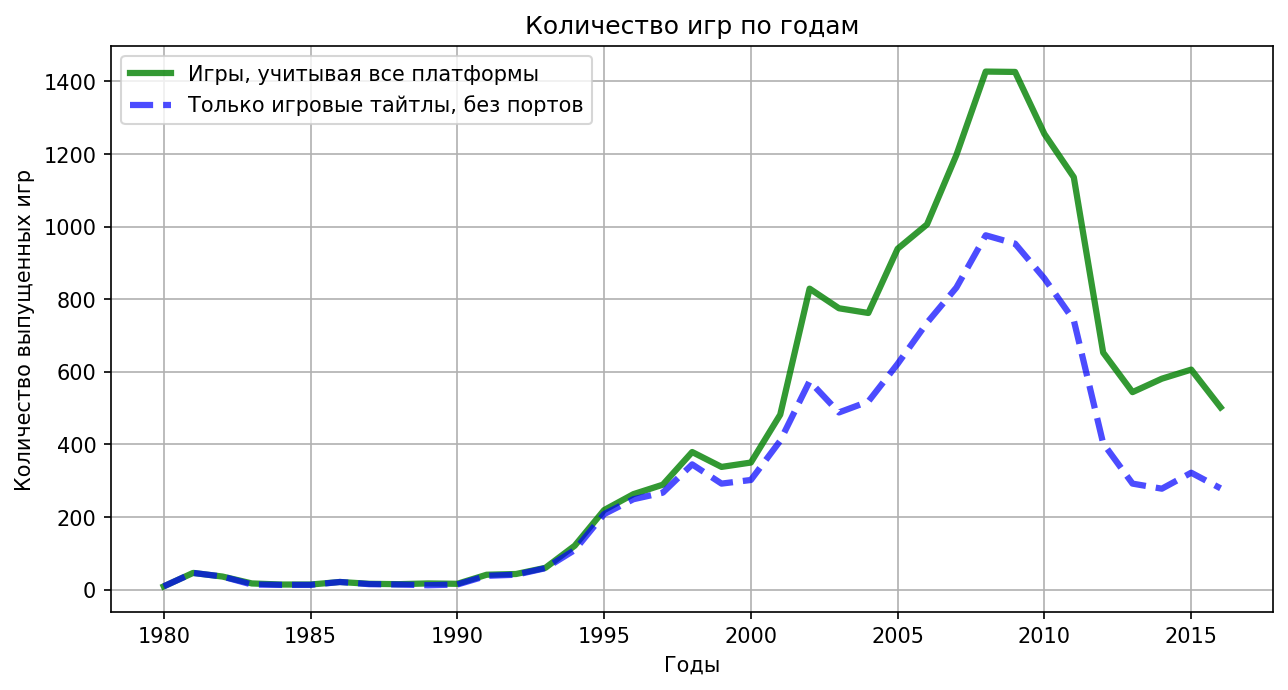

In [45]:
plt.figure(figsize=(10, 5), dpi=150)

# для вывода общей суммы

# сгруппируем данные по году выхода и посчитаем количество значний по столбцу 'name'

df.groupby('year_of_release')['name'].count().plot(
    label='Игры, учитывая все платформы',
    color='green',
    linewidth=3.0,
    alpha=0.8,
    style='-'
)


# для вывода только количества  тайтлов

# отсортируем значения по году выхода, по возрастанию, это требуется чтобы у нас оказалась
# именно дата выхода игры, так как портировать на другие платформы ее могли и через 5 лет
# удалим дубликаты из столбца 'name', сгруппируем таблицу и посчитаем количество значений

df.sort_values('year_of_release').drop_duplicates(subset='name').groupby('year_of_release')['name'].count().plot(
    label='Только игровые тайтлы, без портов',
    color='blue',
    linewidth=3.0,
    alpha=0.7,
    style='--'
)

plt.ylabel('Количество выпущенных игр')
plt.xlabel('Годы')
plt.legend()
plt.grid()
plt.title('Количество игр по годам')

plt.show()

- Рост выхода игр начался в 1990 году, по этому можно оценивать игровую индустрию именно с этой даты.
- Начиная с 1998 года началась эра кроссплатформенных игр. То есть, один и тот же игровой тайтл портировали на разные платформы увеличивая продажи и прибыль, так как портирование стоит сильно меньше чем разработка самой игры.
- В 2000 году начался бурный рост игровой индустрии.
- Золотыми годами игровой индустрии можно считать 2007-2008 год, в этот период вышло около 1000 новых тайтлов (учитывая порты 1400). Но в 2008 году грянул мировой кризис и игровая индустрия схлопнулась и буквально за пару лет откатилась к показателям 2000 года.

<a id='research_02'></a>
### 4.2 Анализ продаж по платформам за все время [▴](#head)

Требуется:
- Посмотреть, как менялись продажи по платформам. 
- Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. 
- Определить, за какой характерный срок появляются новые и исчезают старые платформы?

Подсчитаем суммарные продажи по платформам, а потом отсортируем по убыванию:

In [46]:
platform_sales = df.pivot_table(
    index='platform', 
    values='all_sales', 
    aggfunc='sum').sort_values('all_sales', ascending=False).head(15).reset_index()

platform_sales

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Готово, можно строить столбчатую диаграмму:

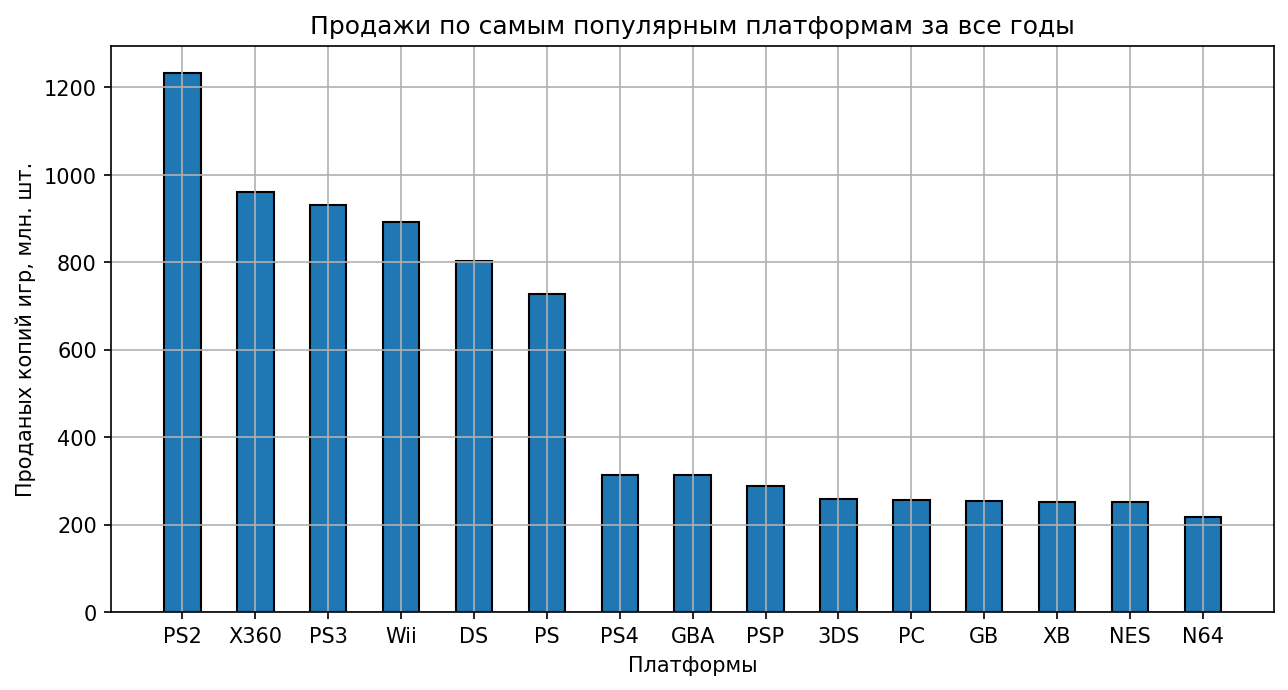

In [47]:
plt.figure(figsize=(10, 5), dpi=150)

plt.bar(
    platform_sales.platform, 
    platform_sales.all_sales,
    width=0.5,
    edgecolor='black',
    linewidth=1
)

plt.ylabel('Проданых копий игр, млн. шт.')
plt.xlabel('Платформы')
plt.grid()
plt.title('Продажи по самым популярным платформам за все годы')

plt.show()

- Из диаграммы видно что самое большое количество игр продано на платформе `Sony PlayStation 2`, но в нашем случае эта информация мало полезна, так игры на эту платформу уже не выходят.

Для того, чтобы определить список актуальных платформ, посмотрим на жизненный цикл консолей. Для этого разобьем продажи по годам.

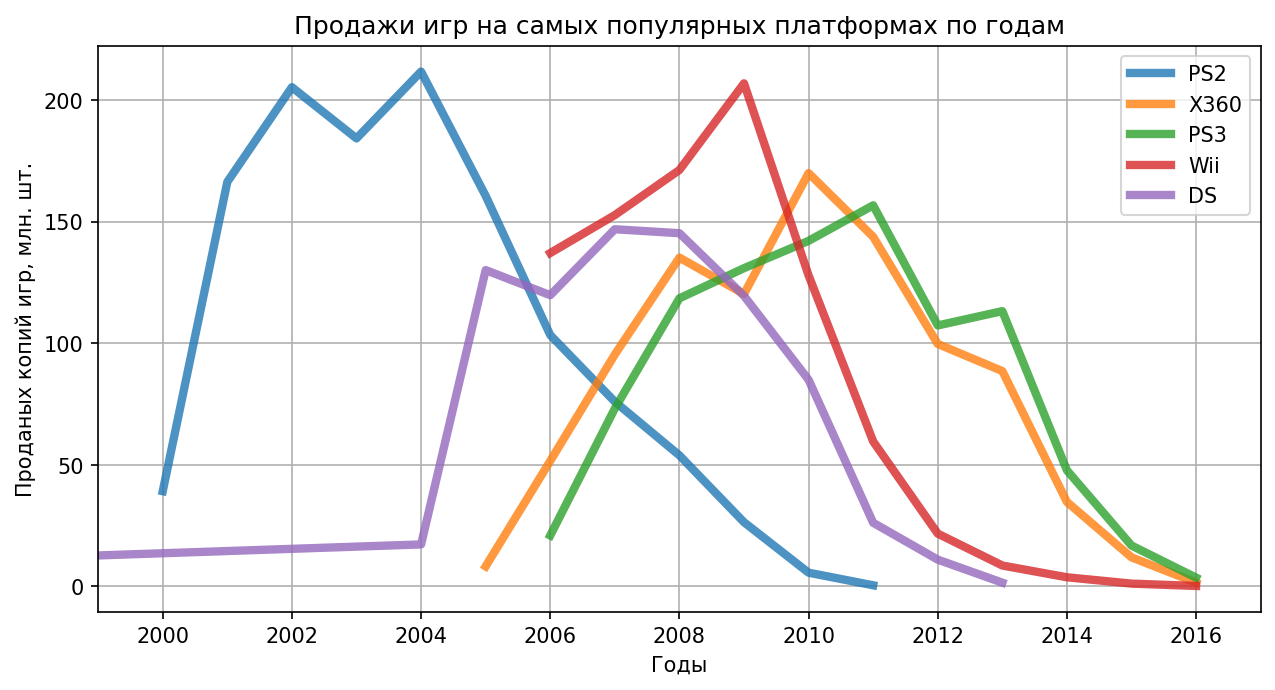

In [48]:
# первым делом возьмем 5 самых популярных платформ и смерджим на них данные о продажах из основного датафрейма.
platform_sales_merged = platform_sales.head(5).merge(df, on='platform', how='left')

plt.figure(figsize=(10, 5), dpi=150)

# для автоматизации запустим цикл
for platform in list(platform_sales.platform.head(5)): # для каждой платформы из 5 самых популярных
    (
        platform_sales_merged[platform_sales_merged.platform == platform]
                     # оставляем с помощью логической индексации данные только по одной из этих платформ поочереди
        .groupby('year_of_release')['all_sales_y'] # группируем данные по годам
        .sum() # находим сумму продаж по годам
        .plot( # выводим график внутри одного figure
            label=platform, # в подписи указываем перебираемую платформу
            linewidth=4.0,
            alpha=0.8,
            style='-'
        )
    )

plt.xlim(1999, 2017) # установим пределы графика, чтобы оставить только актуальные данные
plt.ylabel('Проданых копий игр, млн. шт.')
plt.xlabel('Годы')
plt.legend()
plt.grid()
plt.title('Продажи игр на самых популярных платформах по годам')
    
plt.show()

- Как мы видим из графиков пик продаж для каждой платформы приходится на 2-4 год жизни
- Самый активный период длится 6 лет
- А полный жизненный цикл консоли составляет от 8 до 10 лет

<a id='research_03'></a>
### 4.3 Актуализация выборки для решения текущей задачи  [▴](#head)

Требуется:
- Взять данные за соответствующий **актуальный период**. 
- Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. 
- Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за **предыдущие годы**.

На примере предыдущего графика мы выяснили, что жизненный цикл консоли составляет 8-10 лет. По этому возьмем срез данных начиная с заката актуальных на тот год платформ, то есть с 2013 года включительно.

Для актуальных данных будем использовать новую переменную `df_actual`

In [49]:
df_actual = df[df.year_of_release >= 2013].copy()

In [50]:
df_actual.year_of_release.unique()

array([2013, 2015, 2014, 2016])

Мы оставили последние 4 года для анализа. Приступим.

<a id='research_04'></a>
### 4.4 Определение актуальных лидирующих платформ [▴](#head)

Требуется:
- Определить какие платформы лидируют по продажам, растут или падают?
- Выбрать несколько потенциально прибыльных платформ.

Первым делом посчитаем продажи на актуальных платформах:

In [51]:
# сгруппируем сводную таблицу по платформам, найдем сумму продаж, а так же отсортируем
# по убыванию, чтобы найти самые популярные

actual_platform_sales = df_actual.pivot_table(
    index='platform', 
    values='all_sales', 
    aggfunc='sum').sort_values('all_sales', ascending=False).head(10).reset_index()

actual_platform_sales

,platform,all_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


Построим столбчатую диаграмму по этим данным:

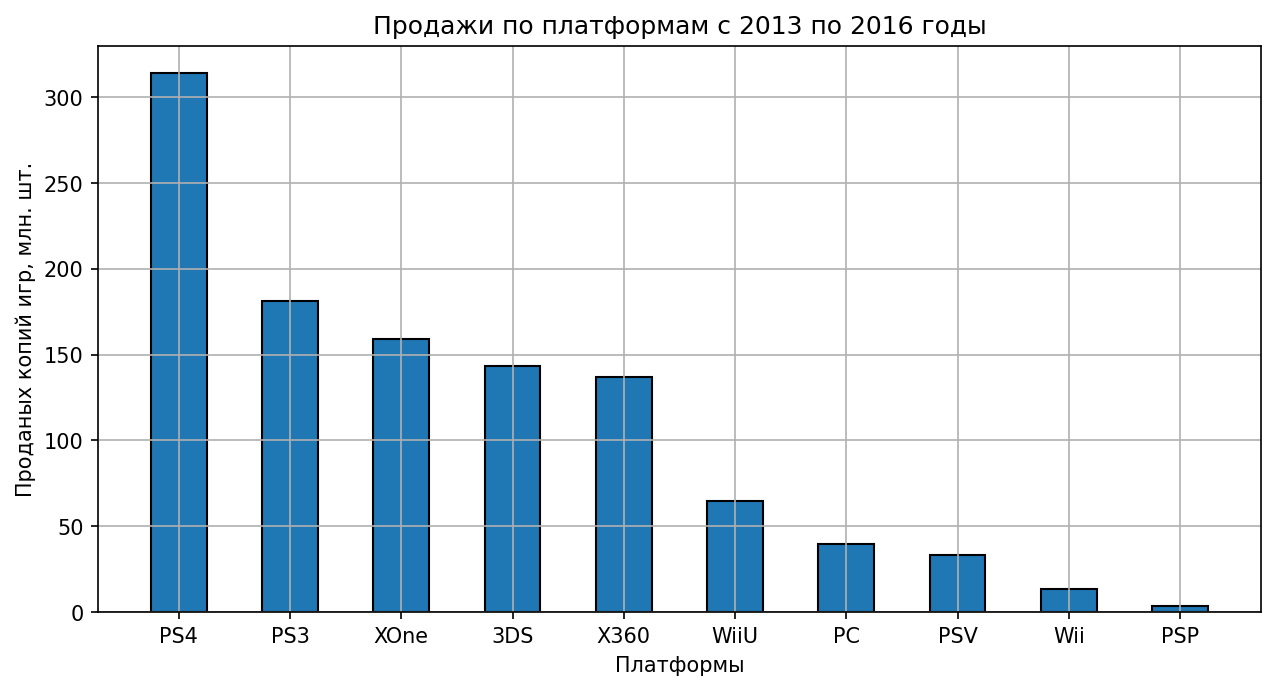

In [52]:
plt.figure(figsize=(10, 5), dpi=150)

plt.bar(
    actual_platform_sales.platform, 
    actual_platform_sales.all_sales,
    width=0.5,
    edgecolor='black',
    linewidth=1
)

plt.ylabel('Проданых копий игр, млн. шт.')
plt.xlabel('Платформы')
plt.grid()
plt.title('Продажи по платформам c 2013 по 2016 годы')

plt.show()

Как только мы срезали данные по актуальным годам, картина сразу поменялась. Лидирует актуальная на данный момент платформа `Sony PS4`.

Возьмем 5 популярных платформ и построим графики по годам, чтобы понять, какая из них растет, а какая падает.

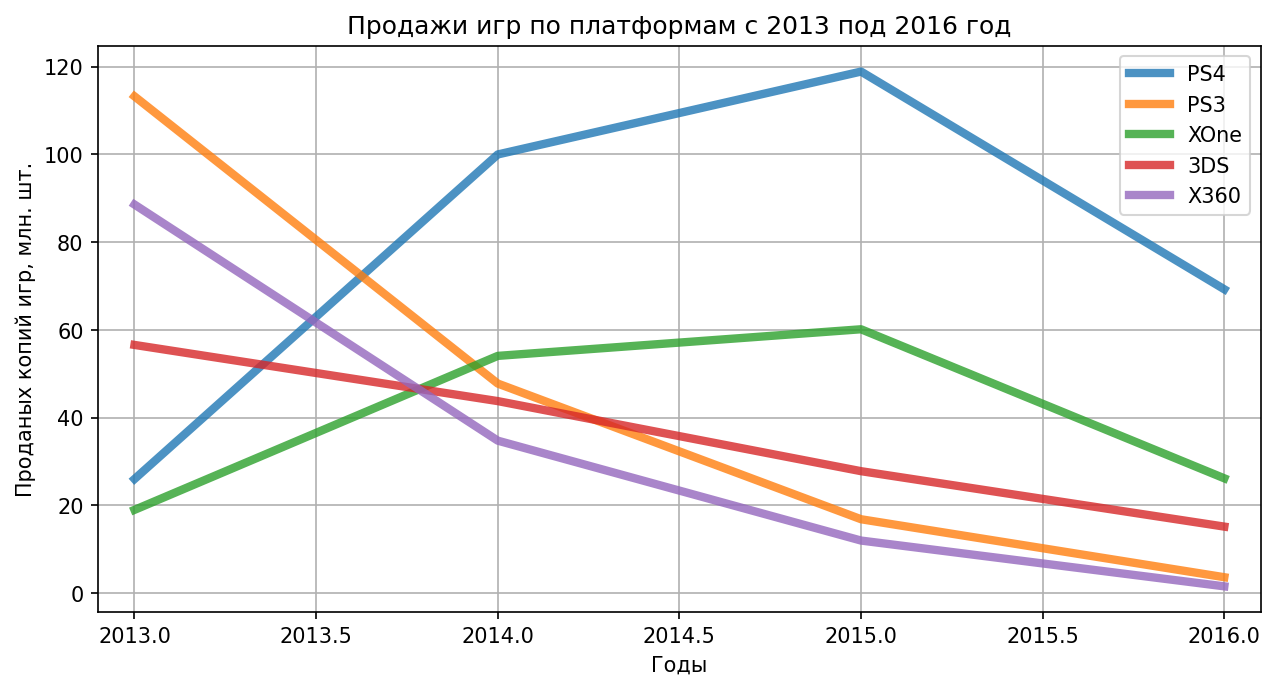

In [53]:
# сначала обогатим информацией данные по платформам
actual_platform_sales_merged = actual_platform_sales.merge(df_actual, on='platform', how='left')

plt.figure(figsize=(10, 5), dpi=150)

for platform in list(actual_platform_sales.platform.head(5)): # оставим 5 популярных платформ и запустим по ним цикл
    (
        actual_platform_sales_merged[actual_platform_sales_merged.platform == platform] # оставляем платформу
        .groupby('year_of_release')['all_sales_y'] # группируем по году
        .sum() # считаем сумму
        .plot( # строим график
            label=platform,
            linewidth=4.0,
            alpha=0.8,
            style='-'
        )
    )

plt.xlim(2012.9, 2016.1)
plt.ylabel('Проданых копий игр, млн. шт.')
plt.xlabel('Годы')
plt.legend()
plt.grid()
plt.title('Продажи игр по платформам с 2013 под 2016 год')
    
plt.show()

- Теперь отчетливо видно, что платформы `Sony PS3`, `Microsoft Xbox360` и `Nintendo 3DS` идут к своему закату
- А плафтормы `Sony PS4` и `Microsoft Xbox One` набирают обороты. 
- Спад в конце графика обусловлен тем, что данные за 2016 год у нас неполные. По итогу продажи на этих двух консолях будут только расти так как они входят в самую активную фазу своего жизненного цикла.

<a id='research_05'></a>
### 4.5 Диаграммы размаха [▴](#head)

Требуется:
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
- Описать результат.

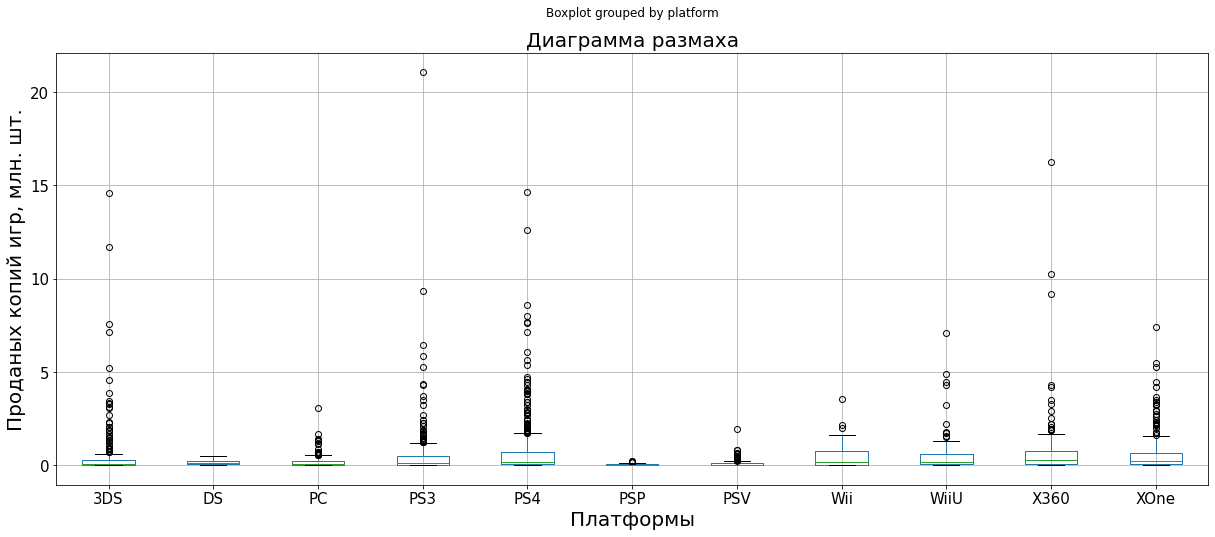

In [54]:
df_actual.boxplot(
    'all_sales', 
    by='platform', 
    figsize=(20, 8),
    fontsize=15
)

plt.ylabel('Проданых копий игр, млн. шт.', fontsize=20)
plt.xlabel('Платформы', fontsize=20)
plt.title('Диаграмма размаха', fontsize=20)

plt.show()

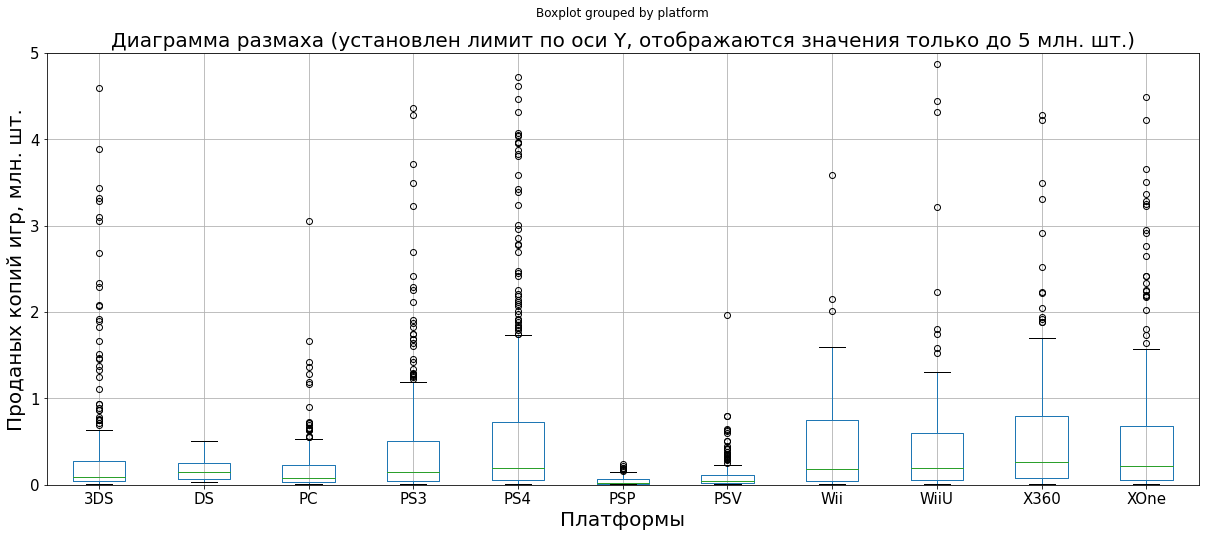

In [55]:
df_actual.boxplot(
    'all_sales', 
    by='platform', 
    figsize=(20, 8),
    fontsize=15
)

plt.ylabel('Проданых копий игр, млн. шт.', fontsize=20)
plt.xlabel('Платформы', fontsize=20)
plt.title('Диаграмма размаха (установлен лимит по оси Y, отображаются значения только до 5 млн. шт.)', fontsize=20)
plt.ylim(0, 5)

plt.show()

По распределению мы можем сказать следующее:
- Подавляющая часть игр довольствуется небольшими продажами (до 1 млн шт). 
- Почти все остальное диаграмма размаха определяет как выбросы, но ошибок в данных нет, это особенности игрового рынка
- Однако мы видим, что чем популярнее платформа, тем выше шанс продаться на ней большим тиражем. Плюс на популярной платформе заведомо больше количество супер успешных проектов, о которых ниже.
- Разброс от 1 до 4 млн копий, можно охарактеризовать как супер популярные игры, по сравнению с основной массой их не так много.
- Ну и более 5 млн продаж это местные "рок-звезды". Это игры, которые снискали всеобщее признание и популярность. Явление крайне редкое.

<a id='research_06'></a>
### 4.6 Влияние отзывов на продажи [▴](#head)

Требуется:
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- Построить диаграмму рассеяния
- Посчитать корреляцию между отзывами и продажами. 
- Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.

Для того, чтобы понять как влияют оценки на продажи игр, построим диаграмму рассеяния. Чтобы было нагляднее, оценки критиков и игроков разместим на одной диаграмме с разным цветом.

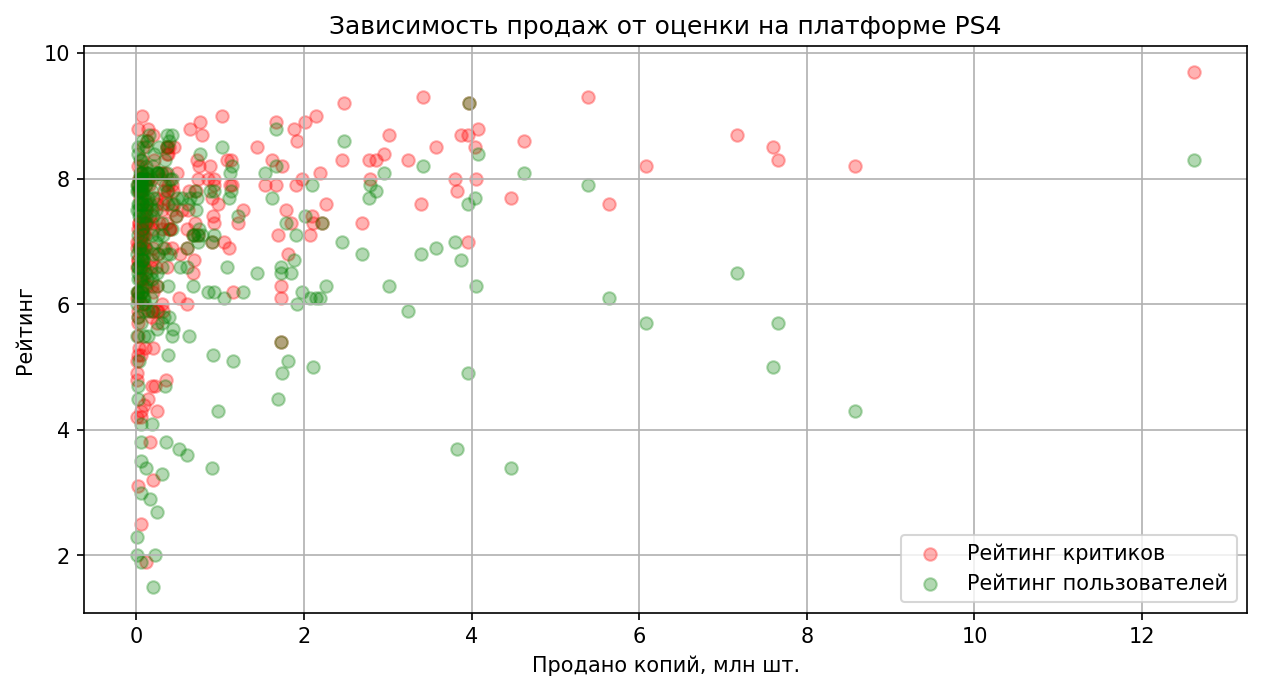

In [56]:
plt.figure(figsize=(10, 5), dpi=150)

# строим диаграмму для оценок критиков
plt.scatter(    
    df_actual[df_actual.platform == 'PS4'].all_sales,
    df_actual[df_actual.platform == 'PS4'].critic_score,
    alpha=0.3,
    label='Рейтинг критиков',
    color='red'
)

# строим диаграмму для оценок полдьзователей
plt.scatter(    
    df_actual[df_actual.platform == 'PS4'].all_sales,
    df_actual[df_actual.platform == 'PS4'].user_score,
    alpha=0.3,
    label='Рейтинг пользователей',
    color='green'
)

plt.legend()
plt.ylabel('Рейтинг')
plt.xlabel('Продано копий, млн шт.')
plt.title('Зависимость продаж от оценки на платформе PS4')
plt.grid()

plt.show()

- По рейтингу критиков видна сильная закономерность `оценки` → `количество продаж`. Однако высокая оценка не гарантирет высокие продажи.
- Зато можно однозначно сказать, что игра с низкими оценками, почти гарантированно плохо продастся. Например для игр набравших меньше 6 баллов, почти нереально продавить отметку выше 1 млн шт.
- А вот по рейтингу пользователей однозначно сказать ничего нельзя, тут полный хаос. 
- Более того, есть интересная особенность, игры которые продались огромными тиражами и получили у критиков 8+ баллов, у пользователей могут получить оценку даже ниже 4 баллов. Это связано с тем, что в игровой среде есть такое явление как Ревью-бомбинг `review bombing`, это когда группа игроков массово идет на сайты с отзывами и ставит определенной игре нулевые оценки, просто потому что "они с чем то не согласны" или они "не такие как все". По этой причине рассматривать пользовательские рейтинги, чтобы строить какие-то прогнозы категорически нельзя.

Посчитаем корреляцию Пирсона для оценок критиков, пользователей и продаж.

In [57]:
(
    df_actual[['all_sales', 'user_score', 'critic_score']]
    .corr()[['all_sales', 'user_score', 'critic_score']]
    .style.background_gradient(axis=None, cmap='YlOrRd')
)

,all_sales,user_score,critic_score
all_sales,1.000000,-0.002608,0.313700
user_score,-0.002608,1.000000,0.502221
critic_score,0.313700,0.502221,1.000000


В целом числовые значения подтверждают нам выводы, которые мы сделали по диаграмме:
- Есть слабая положительная корреляция продаж относительно рейтинга критиков
- Корреляция рейтинга пользователей относительно продаж практически отсутствует

Посмотрим влияние оценок пользователей и критиков относительно продаж на всех платформах:

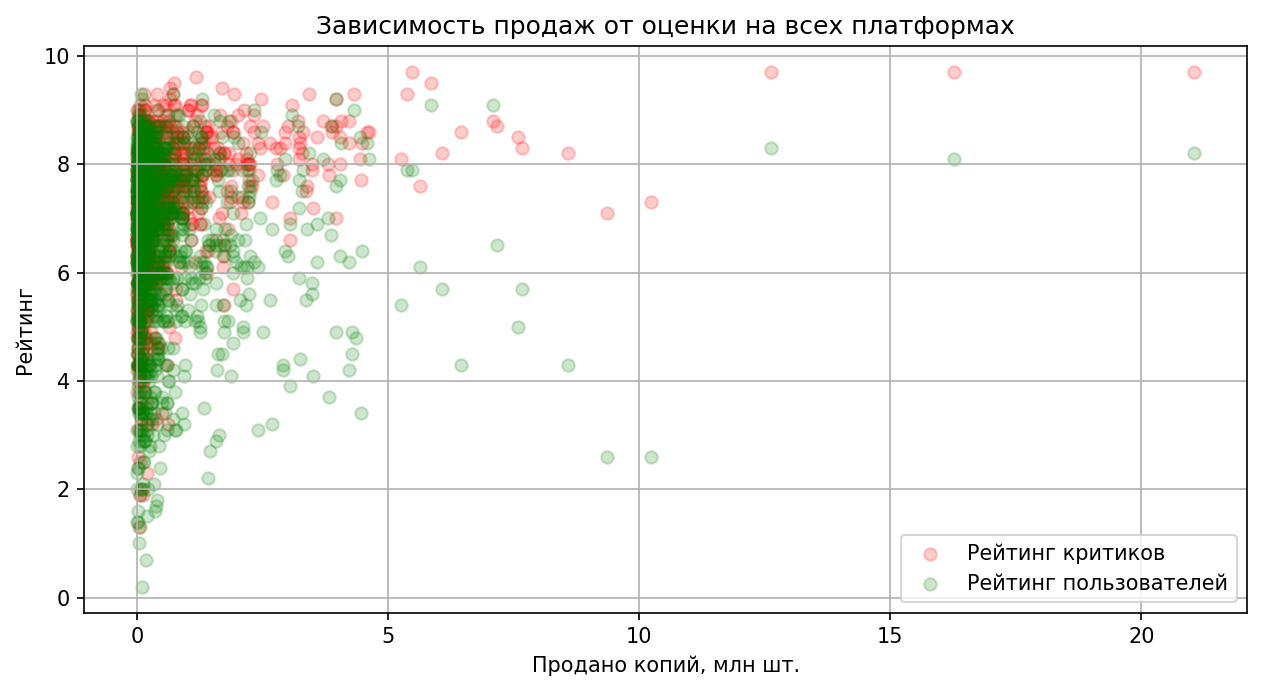

In [58]:
plt.figure(figsize=(10, 5), dpi=150)

plt.scatter(    
    df_actual.all_sales,
    df_actual.critic_score,
    alpha=0.2,
    label='Рейтинг критиков',
    color='red'
)

plt.scatter(    
    df_actual.all_sales,
    df_actual.user_score,
    alpha=0.2,
    label='Рейтинг пользователей',
    color='green'
)

plt.legend()
plt.ylabel('Рейтинг')
plt.xlabel('Продано копий, млн шт.')
plt.title('Зависимость продаж от оценки на всех платформах')
plt.grid()

plt.show()

- Мы видим, что оценки пользователей и критиков никак не зависят от платформы. Картина практически идентична той, что мы видели для платформы Sony PS4.

<a id='research_07'></a>
### 4.7 Распределение игр по жанрам [▴](#head)

Требуется:
- Посмотреть на общее распределение игр по жанрам.
- Что можно сказать о самых прибыльных жанрах? 
- Определить выделяются ли жанры с высокими и низкими продажами?

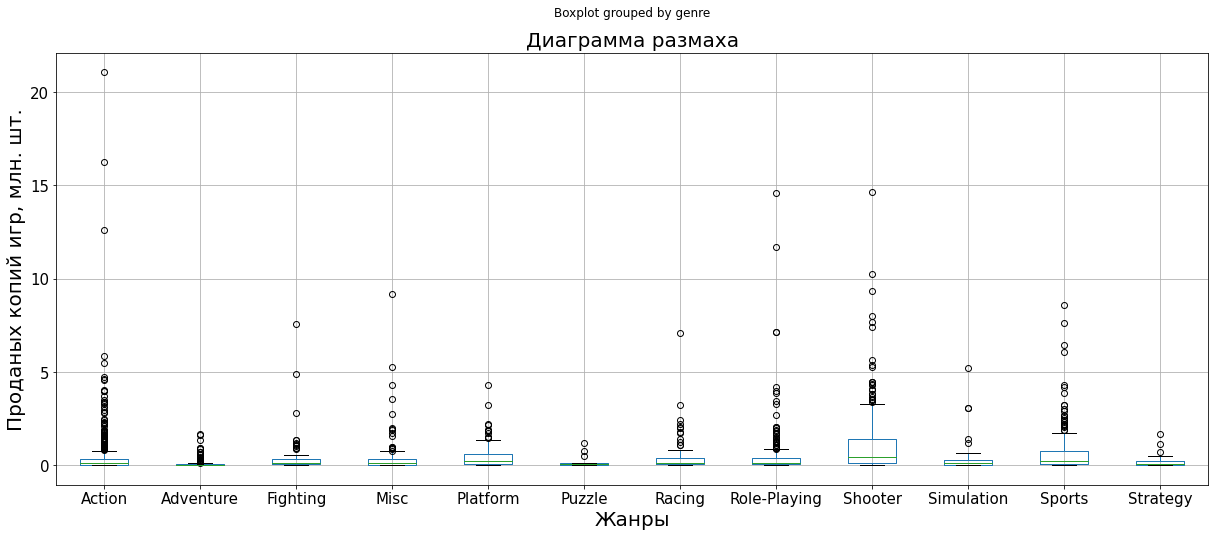

In [59]:
df_actual.boxplot(
    'all_sales', 
    by='genre', 
    figsize=(20, 8),
    fontsize=15
)

plt.ylabel('Проданых копий игр, млн. шт.', fontsize=20)
plt.xlabel('Жанры', fontsize=20)
plt.title('Диаграмма размаха', fontsize=20)

plt.show()

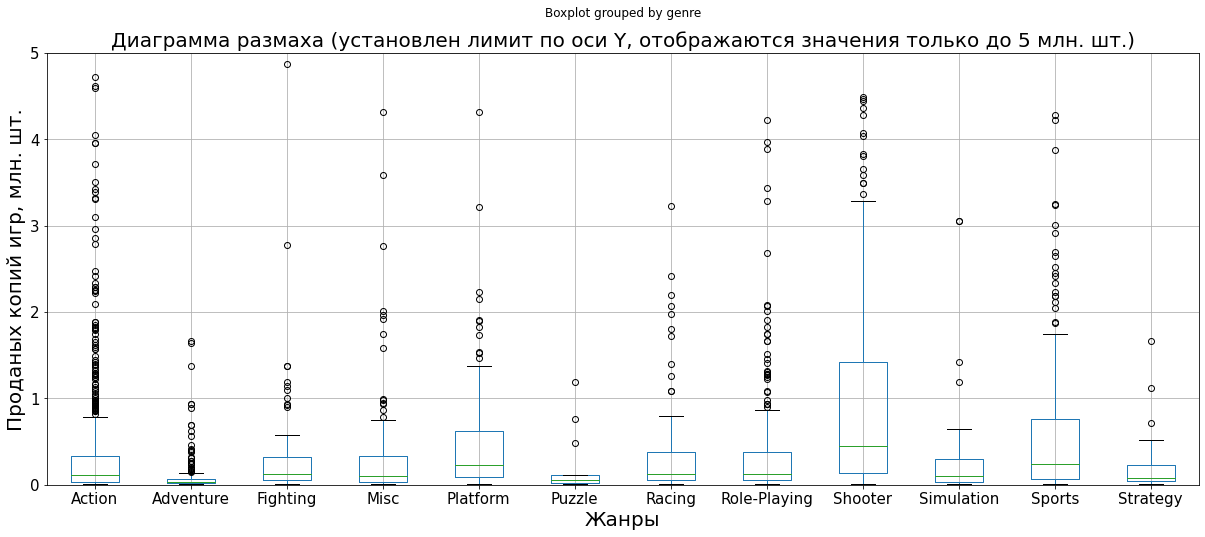

In [60]:
df_actual.boxplot(
    'all_sales', 
    by='genre', 
    figsize=(20, 8),
    fontsize=15
)

plt.ylabel('Проданых копий игр, млн. шт.', fontsize=20)
plt.xlabel('Жанры', fontsize=20)
plt.title('Диаграмма размаха (установлен лимит по оси Y, отображаются значения только до 5 млн. шт.)', fontsize=20)
plt.ylim(0, 5)

plt.show()

In [61]:
df_actual.pivot_table(index='genre', 
                      values='all_sales', 
                      aggfunc=['mean', 'median']).sort_values(('median', 'all_sales'), ascending=False)

,mean,median
,all_sales,all_sales
genre,,
Shooter,1.245882,0.450
Sports,0.703972,0.240
Platform,0.576081,0.225
Role-Playing,0.499623,0.125
Fighting,0.441375,0.125
Racing,0.469294,0.120
Action,0.420196,0.110
Simulation,0.350968,0.100


Для оценки популярности мы будем использовать **медианное** значение, так как в данных есть огромное количество выбросов, среднее значение даст нам более смазанную картину.
- Жанр с самыми стабильно высокими продажами можно считать `Shooter` он лидирует с большим отрывом
- Следующие жанры по стабильно большим продажам можно считать `Sports` и `Platform`, однако стоит учитывать, что платформеры как правило выпускают небольшие команды за невысокую цену и количество продаж не равно высокая прибыль с них.
- Еще стоит отметить жанры `Action` и `Role-Playing`. Медианное значение у них не такое высокое, однако в этих жанрах большое количество игр с огромными тиражами. Особенно жанр `Action`. Так что при планировании рекламной кампании стоит учитывать эти жанры тоже.

<a id='research_08'></a>
### 4.8 Портрет пользователя каждого региона [▴](#head)

Требуется определить для пользователя каждого региона (`NA`, `EU`, `JP`):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Топ-5 популярных платформ**

Для начала найдем продажи по платформам в необходимых регионах. Результат отсортируем по убыванию.

In [62]:
region_platform_na = df_actual.pivot_table(
    index='platform', 
    values='na_sales', 
    aggfunc='sum').sort_values('na_sales', ascending=False).reset_index().reset_index()
                                            # сбросим индекс, чтобы получить числовые значения в простом столбце
                                            # это пригодится в дальнейшем для применения функции .where()

region_platform_eu = df_actual.pivot_table(
    index='platform', 
    values='eu_sales', 
    aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index().reset_index()

region_platform_jp = df_actual.pivot_table(
    index='platform', 
    values='jp_sales', 
    aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index().reset_index()

In [63]:
# посмотрим на одну из таблиц

display(region_platform_na)

,index,platform,na_sales
0,0,PS4,108.74
1,1,XOne,93.12
2,2,X360,81.66
3,3,PS3,63.50
4,4,3DS,38.20
5,5,WiiU,29.21
6,6,PC,11.11
7,7,Wii,6.56
8,8,PSV,5.04
9,9,DS,0.57


Так как нам требуется только Топ-5 платформ в каждом регионе, все остальные платформы загоним в категорию `Прочее` с помощью функции `.where()`

In [64]:
tables = [region_platform_na,
          region_platform_eu,
          region_platform_jp]

# сначала заменим все значения ниже 5-го индекса на 'Прочее'
for table in tables:
    table['platform'] = table['platform'].where(table['index'] < 5, 'Прочее')

    
# сделаем сводные таблицы по обновленным данным
region_platform_na = (region_platform_na
                      .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                      .sort_values('na_sales'))

region_platform_eu = (region_platform_eu
                      .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                      .sort_values('eu_sales'))

region_platform_jp = (region_platform_jp
                      .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                      .sort_values('jp_sales'))

In [65]:
# проверим результат работы функции

display(region_platform_na)

,na_sales
platform,
3DS,38.20
Прочее,52.49
PS3,63.50
X360,81.66
XOne,93.12
PS4,108.74


Построим круговые диаграммы по полученным таблицам:

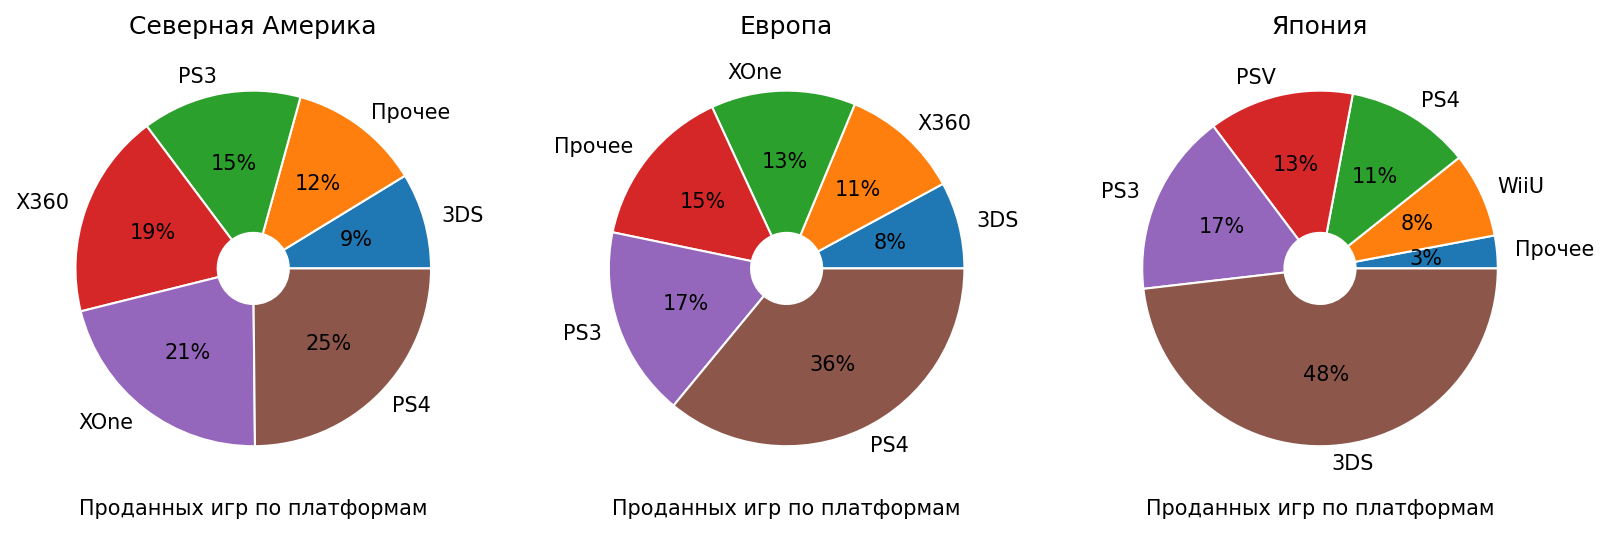

In [66]:
tables = [region_platform_na,
          region_platform_eu,
          region_platform_jp]

sales_column = ['na_sales', 
                'eu_sales', 
                'jp_sales']

titles = ['Северная Америка',
          'Европа', 
          'Япония']

plt.figure(figsize=(13, 7), dpi=150)

for num, table, column, title in zip(range(1, 4), tables, sales_column, titles):
    plt.subplot(1, 3, num)
    plt.pie(
        table[column],
        labels=table.index,
        autopct='%1.0f%%',
        wedgeprops={'linewidth': 1.0, 'edgecolor': 'white', 'width': 0.8},
        textprops={'size': 'medium'}
    )
    plt.title(title)
    plt.xlabel('Проданных игр по платформам')

plt.show()

- В Северной Америке лидерство держат актуальные платформы `Sony PS4` и `Xbox One`, на втором месте платформы прошлого поколения `XBox 360` и `Sony PS3`
- В Европе с большим опережением лидирует актуальная платформа `Sony PS4`, а вот со вторым местом интереснее, там расположилась платформа прошлого поколения `Sony PS3`, это говорит нам о том, что в Европе платформы Sony намного популярнее платформ Microsoft
- В Японии как обычно своя атмосфера, безоговорочное лидерство там держит портативная платформа `Nintendo 3DS`. Остальную часть рынка делят между собой три платформы от Sony: `PS3`, портативная `PS Vita` и лишь на четвертом месте консоль текущего поколения `PS4`

Все эти особенности стоит учитывать при запуске рекламных кампаний. Например, нет смысла рекламировать игры на XBox в Японии, так как это будет слитый в никуда бюджет.

**Топ-5 популярных жанров**

Для начала найдем продажи по жанрам в необходимых регионах. Результат отсортируем по убыванию.

In [67]:
region_genre_na = df_actual.pivot_table(
    index='genre', 
    values='na_sales', 
    aggfunc='sum').sort_values('na_sales', ascending=False).reset_index().reset_index()

region_genre_eu = df_actual.pivot_table(
    index='genre', 
    values='eu_sales', 
    aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index().reset_index()

region_genre_jp = df_actual.pivot_table(
    index='genre', 
    values='jp_sales', 
    aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index().reset_index()

In [68]:
# проверим результат на одном из регионов

display(region_genre_na)

,index,genre,na_sales
0,0,Action,126.05
1,1,Shooter,109.74
2,2,Sports,65.27
3,3,Role-Playing,46.40
4,4,Misc,27.49
5,5,Platform,18.14
6,6,Fighting,15.55
7,7,Racing,12.96
8,8,Adventure,7.14
9,9,Simulation,4.86


Так как нам требуется только Топ-5 жанров в каждом регионе, все остальные жанры загоним в категорию `Прочее` с помощью функции `.where()`

In [69]:
tables = [region_genre_na,
          region_genre_eu,
          region_genre_jp]

for table in tables:
    table['genre'] = table['genre'].where(table['index'] < 5, 'Прочее')

region_genre_na = (region_genre_na
                   .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                   .sort_values('na_sales'))

region_genre_eu = (region_genre_eu
                   .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                   .sort_values('eu_sales'))

region_genre_jp = (region_genre_jp
                   .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                   .sort_values('jp_sales'))

In [70]:
# проверим результат на одном из регионов

display(region_genre_na)

,na_sales
genre,
Misc,27.49
Role-Playing,46.40
Прочее,62.76
Sports,65.27
Shooter,109.74
Action,126.05


Построим круговые диаграммы по полученным таблицам:

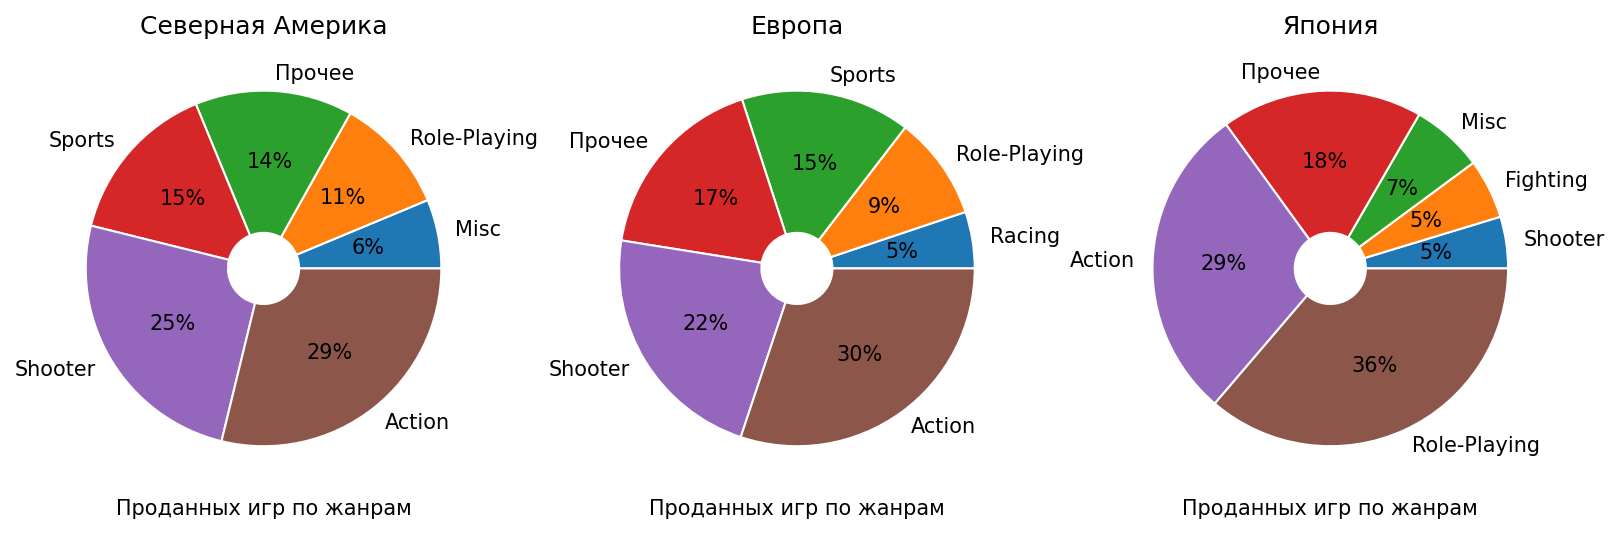

In [71]:
tables = [region_genre_na,
          region_genre_eu,
          region_genre_jp]

sales_column = ['na_sales', 
                'eu_sales', 
                'jp_sales']

titles = ['Северная Америка',
          'Европа', 
          'Япония']

plt.figure(figsize=(13, 7), dpi=150)

for num, table, column, title in zip(range(1, 4), tables, sales_column, titles):
    plt.subplot(1, 3, num)
    plt.pie(
        table[column],
        labels=table.index,
        autopct='%1.0f%%',
        wedgeprops={'linewidth': 1.0, 'edgecolor': 'white', 'width': 0.8},
        textprops={'size': 'medium'}
    )
    plt.title(title)
    plt.xlabel('Проданных игр по жанрам')

plt.show()

- В Европе и США с большим отрывом по популярности лидируют игры категории `Action` и `Shooter`, на третьем месте расположились игры категории `Sport`
- В Японии наиболее популярны RPG `Role-Playing`, на втором месте `Action`. Все остальные жанры занимают незначительную долю.

**Влияние рейтинга ESRB**

Найдем сумму продаж по каждому региону в разрезе возрастного рейтинга:

In [72]:
region_rating_group_na = df_actual.pivot_table(
    index='rating_group', 
    values='na_sales', 
    aggfunc='sum').sort_values('na_sales', ascending=False)

region_rating_group_eu = df_actual.pivot_table(
    index='rating_group', 
    values='eu_sales', 
    aggfunc='sum').sort_values('eu_sales', ascending=False)

region_rating_group_jp = df_actual.pivot_table(
    index='rating_group', 
    values='jp_sales', 
    aggfunc='sum').sort_values('jp_sales', ascending=False)

In [73]:
# проверим данные по одному из регионов

display(region_rating_group_na)

,na_sales
rating_group,
Для взрослых,165.21
Без рейтинга,89.42
Для всех,79.05
От 10 лет,54.24
От 13 лет,49.79


Построим круговые диаграммы по полученным таблицам:

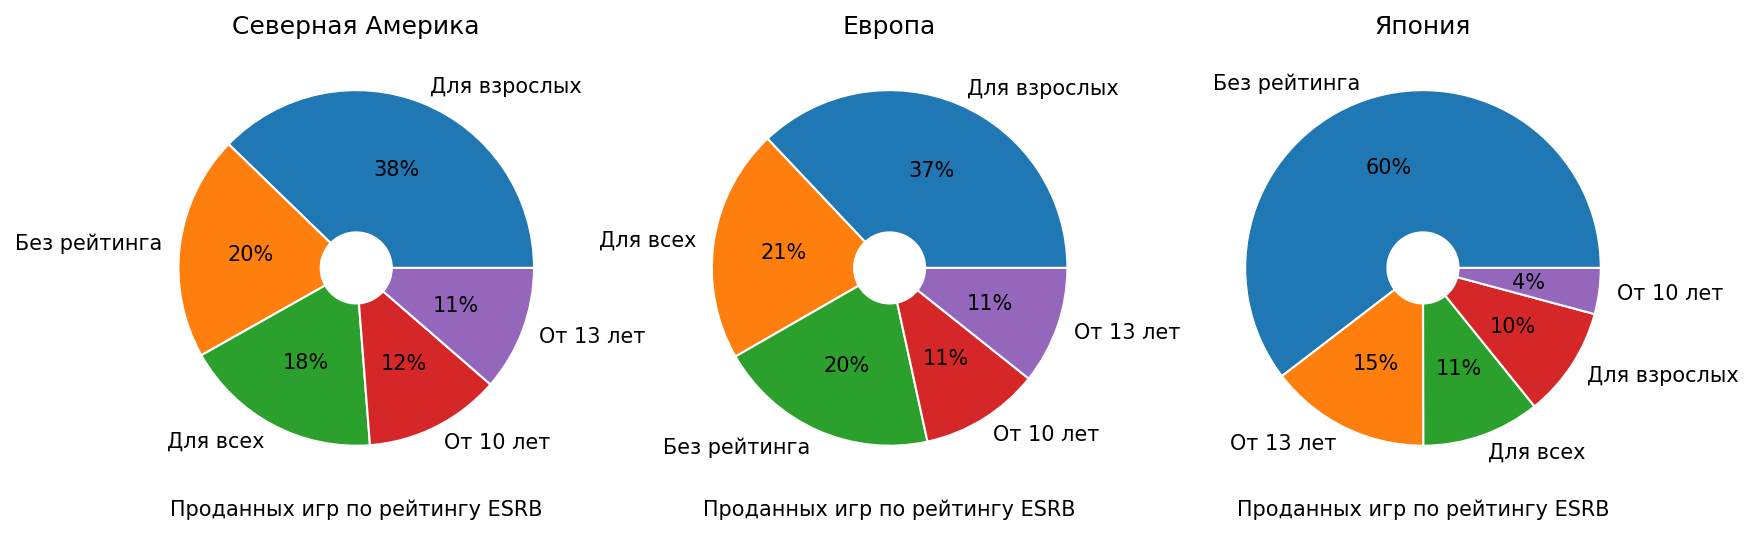

In [74]:
tables = [region_rating_group_na,
          region_rating_group_eu,
          region_rating_group_jp]

sales_column = ['na_sales', 
                'eu_sales', 
                'jp_sales']

titles = ['Северная Америка',
          'Европа', 
          'Япония']

plt.figure(figsize=(13, 7), dpi=150)

for num, table, column, title in zip(range(1, 4), tables, sales_column, titles):
    plt.subplot(1, 3, num)
    plt.pie(
        table[column],
        labels=table.index,
        autopct='%1.0f%%',
        wedgeprops={'linewidth': 1.0, 'edgecolor': 'white', 'width': 0.8},
        textprops={'size': 'medium'}
    )
    plt.title(title)
    plt.xlabel('Проданных игр по рейтингу ESRB')
plt.show()

- Картина для США и Европы практически идентинчная, подавляющую часть занимают игры для взрослой аудитории. Примерно такую же часть занимает сумма игр для детей и подростков 10 и 13 лет вместе взятых. 20-ти провентная часть игр без рейтинга означает что эти игры не сертифицировались по системе ESRB.
- В Японии подавляющая часть игр не маркирована по системе ESRB, скорей всего это означает что на рынке доминируют игры сделанные для собственного рынка, которые не предназначались для продажи в Европе и США. Возможно у этих игр есть какой то локальный возрастной рейтинг, но этих данных нам не предоставили. 

<a id='research_conclusions'></a>
### Выводы [▴](#head)

После проведенных исследований мы выяснили:
- Актуальными на текущий момент платформами являются `Sony PS4` и `Microsoft XBox One`, они находятся на самой продуктивной (в плане продаж игр) части своего жизненного цикла.
- Не смотря на свою популярность в прошлом, платформы `Sony PS3`, `Microsoft Xbox360` и `Nintendo 3DS` подошли к своему закату и планировать рекламные кампании для них сейчас не имеет никакого смысла.
- Подавляющая часть игр продается тиражем до 1 млн шт. Крайне немногочисленные хиты добираются до продаж в 4 млн. И единицы имеют продажи свыше 5 млн.
- Продажи игры достаточно сильно зависят от оценок критиков, при низких оценках у игры почти нет шансов продаться существенным тиражем. Рейтинг пользователей можно не рассматривать вообще, так как он больше имеет эмоциональный окрас и на продажи игры никак не влияет.
- Самые популярные жанры по продажам `Action`, `Shooter`, `Sports` и `Role-Playing`, они занимают почти 80% рынка.
- В Северной Америке можно планировать рекламную кампанию для платформ `PS4` и `Xbox One`, В Европе лучше сосредоточиться только на `PS4`. В Японии сложно однозначно сказать. Основную часть рынка занимает устаревшая `3DS`, а актуальную `PS4` купило слишком мало пользователей. Возможно в 2017 стоит игнорировать этот рынок пока там не появится достаточное количество пользователей актуальной игровой платформы или не появится наслденик `Nintendo 3DS`, который заполнит рынок (спойлер, появится как раз в 2017 :)
- Самые популярные жанры в США и Европе - `Action`, `Shooter`и `Sport`. В Японии - `Role-Playing` и `Action`
- В США и Европе наибольшие продажи делают игры рассчитанные на взрослую аудиторию. В Японии анализ затруднителен, так как в этом регионе преобладают игры которые не прошли сертификацию по системе ESRB.

<a id='hypotheses'></a>
## 5. Проверка гипотез

<a id='hypotheses_01'></a>
### 5.1 Пользовательские рейтинги платформ Xbox One и PC [▴](#head)

Надо проверить, одинаковые ли средние пользовательские рейтинги игр с платформ `Xbox One` и `PC`.

Нам требуется проверить гипотезу о равенстве средних двух генеральных совокупностей, эти совокупности представляют собой пользовательские рейтинги игр с платформ `Xbox One` и `PC`. 

Для этого используем метод `scipy.stats.ttest_ind()`, так как выборки у нас разного размера, параметр `equal_var` установим в положение: `False`. Теперь сформируем нулевую и альтернативную гипотезы. Нулевая гипотеза всегда формируется так, чтобы использовался знак равенства, отсюда получаем:

- Гипотеза `H₀` - Средние пользовательские рейтинги игр с платформы `Xbox One` равны средним пользовательским рейтингам игр с платформы `PC`
- Гипотеза `H₁` - Средние пользовательские рейтинги игр платформ `Xbox One` и `PC` отличаются

Первым делом получим выборки из нашего датасета. 

Дополнительно удалим `NaN` значения, так как с ними не получится провести статистический тест.

In [75]:
xbox_score_array = df_actual.query('platform == "XOne" and user_score == user_score')['user_score']
pc_score_array = df_actual.query('platform == "PC" and user_score == user_score')['user_score']

Проверим гипотезу

In [76]:
alpha = 0.01 # установим пороговое значение в 1%

results = st.ttest_ind(
    xbox_score_array, 
    pc_score_array, 
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


- `p-значение` больше чем пороговое значение, поэтому у нас **не получилось отвергнуть нулевую гипотезу**. Следовательно мы можем предположить, что в генеральной совокупности средние пользовательские рейтинги игр с платформ `Xbox One` и `PC` примерно равны.

<a id='hypotheses_02'></a>
### 5.2 Пользовательские рейтинги жанров Action и Sports [▴](#head)

Надо проверить, отличаются ли средние пользовательские рейтинги игр жанров `Action` и `Sports`.

Нам требуется проверить гипотезу о равенстве средних двух генеральных совокупностей, эти совокупности представляют собой пользовательские рейтинги игр жанров `Action` и `Sports`. 

Для этого используем метод `scipy.stats.ttest_ind()`, так как выборки у нас разного размера, параметр `equal_var` установим в положение: `False`. Теперь сформируем нулевую и альтернативную гипотезы. Нулевая гипотеза всегда формируется так, чтобы использовался знак равенства, отсюда получаем:

- Гипотеза `H₀` - Средние пользовательские рейтинги игр жанра `Action` равны средним пользовательским рейтингам игр жанра `Sports`
- Гипотеза `H₁` - Средние пользовательские рейтинги игр жанров `Action` и `Sports` отличаются

Первым делом получим выборки из нашего датасета. 

Дополнительно удалим `NaN` значения, так как с ними не получится провести статистический тест.

In [77]:
action_score_array = df_actual.query('genre == "Action" and user_score == user_score')['user_score']
sports_score_array = df_actual.query('genre == "Sports" and user_score == user_score')['user_score']

Проверим гипотезу

In [78]:
alpha = 0.01 # установим пороговое значение в 1%

results = st.ttest_ind(
    action_score_array, 
    sports_score_array, 
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


- `p-значение` намного ниже чем пороговое значение, поэтому мы **отвергаем нулевую гипотезу**. Следовательно мы можем предположить, что в генеральной совокупности средние пользовательские рейтинги игр жанров платформ `Action` и `Sports` различаются.

<a id='hypotheses_conclusions'></a>
### Выводы [▴](#head)

Мы проверили гипотезы и выяснили следующее:

- Гипотезу о равенстве средних пользовательских рейтингов с платформ `Xbox One` и `PC` у нас **не получилось отвергнуть**. Мы можем предположить, что в генеральной совокупности средние пользовательские рейтинги игр с платформ `Xbox One` и `PC` **примерно равны**.
- Гипотезу о равенстве средних пользовательских рейтингов жанров `Action` и `Sports` мы **отвергли**. Следовательно мы можем предположить, что в генеральной совокупности средние пользовательские рейтинги игр жанров платформ `Action` и `Sports` **различаются**.


<a id='final_conclusion'></a>
## 6. Общий вывод

<a id='final_conclusion_01'></a>
### 6.1 Общая информация [▴](#head)

- Предоставленных данных оказалось достаточно для проведения аналитической работы.
- Данные в исходной таблице были не сильно загрязнены и большинство недочетов было устранено на этапе предобработки.

<a id='final_conclusion_02'></a>
### 6.2 Предобработка данных [▴](#head)

В процессе предобработки были проведены следующие работы:

**Столбец: `name`**
- Было удалено 2 строки с пропусками (0.012% от датафрейма). Заменить эти значения не представлялось возможным. 
- В столбце обнаружилось 28 неявных дубликатов. Мы устранили их.

**Столбец: `year_of_release`**
- Было удалено 269 строк с пропусками (1.6% от датафрейма). Замена потребовала бы ощутимую потерю времени. Было разумнее избавиться от этих значений.
- Тип данных изменен с `float` на `int`

**Столбец: `critic_score`**
- В этом столбце пропущено 8461 значение (51.5% от датафрейма). Оставили это как есть, так как при таком количестве пропусков невозможно подобрать адекватную замену для значений.

**Столбец: `user_score`**
- Изначально было пропущено 6605 значений (40.2% от датафрейма). Оставили это как есть, так как при таком количестве пропусков невозможно подобрать адекватную замену для значений.
- Значение `tbd` в столбце `user_score` было заменено на `NaN` (после этого количество пропусков стало 8981 штук, 54.6% от датафрейма)
- Тип данных изменен с `object` на `float`

**Столбец: `rating`**
- В столбце было 6676 пропущенных значения (40.6% от датафрейма). Заменили эти пропуски на значение `no_rating`

Полных дубликатов в таблице обнаружено небыло.

<a id='final_conclusion_03'></a>
### 6.3 Расчеты и дообогщение таблицы [▴](#head)

- Мы категоризировали возрастной рейтинг, чтобы уменьшить фрагментацию данных.
- Добавили столбец с суммой продаж по всем регионам
- Привели оценки критиков и игроков к единому порядку, теперь оценки выставлены и там и там по шкале `от 0 до 10`

<a id='final_conclusion_04'></a>
### 6.4 Исследовательский анализ данных [▴](#head)

- Актуальными на текущий момент платформами являются `Sony PS4` и `Microsoft XBox One`, они находятся на самой продуктивной (в плане продаж игр) части своего жизненного цикла.
- Не смотря на свою популярность в прошлом, платформы `Sony PS3`, `Microsoft Xbox360` и `Nintendo 3DS` подошли к своему закату и планировать рекламные кампании для них сейчас не имеет никакого смысла.
- Подавляющая часть игр продается тиражем до 1 млн шт. Крайне немногочисленные хиты добираются до продаж в 4 млн. И единицы имеют продажи свыше 5 млн.
- Продажи игры достаточно сильно зависят от оценок критиков, при низких оценках у игры почти нет шансов продаться существенным тиражем. Рейтинг пользователей можно не рассматривать вообще, так как он больше имеет эмоциональный окрас и на продажи игры никак не влияет.
- Жанр с самыми стабильно высокими продажами можно считать `Shooter`. На втором месте по стабильно хорошим продажам: `Sports`. Чуть ниже средние продажи у жанров `Action` и `Role-Playing` однако у них чаще встречаются игры с огромными тиражами. Так что при планировании рекламной кампании стоит учитывать эти жанры тоже.
- В Северной Америке можно планировать рекламную кампанию для платформ `PS4` и `Xbox One`, В Европе лучше сосредоточиться только на `PS4`. В Японии сложно однозначно сказать. Основную часть рынка занимает устаревшая `3DS`, а актуальную `PS4` купило слишком мало пользователей. Возможно в 2017 стоит игнорировать этот рынок пока там не появится достаточное количество пользователей актуальной игровой платформы или не появится наслденик `Nintendo 3DS`, который заполнит рынок (спойлер, появится как раз в 2017 :)
- Самые популярные жанры в США и Европе - `Action`, `Shooter`и `Sport`. В Японии - `Role-Playing` и `Action`
- В США и Европе наибольшие продажи делают игры рассчитанные на взрослую аудиторию. В Японии анализ затруднителен, так как в этом регионе преобладают игры которые не прошли сертификацию по системе ESRB.

<a id='final_conclusion_05'></a>
### 6.5 Проверка гипотез [▴](#head)

- Гипотезу о равенстве средних пользовательских рейтингов с платформ `Xbox One` и `PC` у нас **не получилось отвергнуть**. Мы можем предположить, что в генеральной совокупности средние пользовательские рейтинги игр с платформ `Xbox One` и `PC` **примерно равны**.
- Гипотезу о равенстве средних пользовательских рейтингов жанров `Action` и `Sports` мы **отвергли**. Следовательно мы можем предположить, что в генеральной совокупности средние пользовательские рейтинги игр жанров платформ `Action` и `Sports` **различаются**.


<a id='final'></a>
### Итоги [▴](#head)

**После проведенных исследований можно сказать следующее:**
- Актуальными на текущий момент платформами являются `Sony PS4` и `Microsoft XBox One`, они находятся на самой продуктивной (в плане продаж игр) части своего жизненного цикла. Следует планировать рекламные кампании именно на эти платформы.

- Жанр с самыми стабильно высокими продажами можно считать `Shooter`, основное внимание при планировании рекламы стоит обратить на него. На втором месте по стабильно хорошим продажам: `Sports`. Чуть ниже средние продажи у жанров `Action` и `Role-Playing` однако у них чаще встречаются игры с огромными тиражами. Так что при планировании рекламной кампании стоит учитывать эти жанры тоже.

- Стоит учитывать отзывы критиков, так как низкие оценки почти гарантированно означают низкие продажи у игры. А вот отзывы игроков стоит польностью игнорировать, так как взаимосвязи `оценка` → `продажи` нет, из-за того, что оценки игроков носят больше эмоциональный окрас.

**Если рассматривать разбивку по регионам, данные следущие:**
- В Северной Америке можно планировать рекламную кампанию для платформ `PS4` и `Xbox One`
- В Европе лучше сосредоточиться только на `PS4`. 
- В Японии в 2017 году имеет смысл не планировать рекламную кампанию, так как основную часть рынка занимает устаревшая `3DS`, на которую игры практически не продаются, а актуальную платформу `PS4` купило слишком мало пользователей. 
- Самые популярные жанры в США и Европе - `Action`, `Shooter`и `Sport`. В Японии - `Role-Playing` и `Action`
- В США и Европе наибольшие продажи делают игры рассчитанные на взрослую аудиторию. В Японии анализ затруднителен, так как в этом регионе преобладают игры которые не прошли сертификацию по системе ESRB.